# Fitbit Downloader

### About Fitbit Data Downloader: 

File file provides a way to download your fitbit data to CSV, including heart rate, sleep, sleeps and weight. Some simple visualizations are used to check numbers. See fitbit data analysis file for more in-depth data visualizations.

### Setup and Installation Steps

Getting the Credentials setup for FitBit integration is a bit annoying, but if you fall these steps, it should work. 

* Create a developer application at https://dev.fitbit.com/ 
* Set your callback URL as http://127.0.0.1:8080/
* From your Fitbit application, copy your "OAuth 2.0 Client ID" and "Client Secret" 
* Install Python Fitbit: `$ pip install fitbit`
* Clone or Download https://github.com/orcasgit/python-fitbit
* Navigate to python-fitbit directory and install the dependencies with `$ sudo pip install -r requirements/base.txt`
* Inside python-fitbit directory run this command `$ python gather_keys_oauth2.py <client-id> <client-secret>`
* This should redirect you to fitbit website where you you will signin and authorize your user. 
* After you will be redirected to your localhost url. Inside the terminal, you will receive a message that includes your token info. Copy all the info. 
* Copy credentials-sample.json to credentials.json
* Inside credentials-sample.json add your info. 


## Acknowledgements and Helpful Resources

* [Collect Your Own Fitbit Data with Python](https://towardsdatascience.com/collect-your-own-fitbit-data-with-python-ff145fa10873) and [Code](https://github.com/stephenjhsu/fitbit) by Stephen Hsu
* 

### Libraries and Dependencies

In [103]:
import fitbit
# import gather_keys_oauth2 as Oauth2
import numpy as np
import pandas as pd 
import datetime
import dateutil.parser
import seaborn
import time
%matplotlib inline

### Credentials and Authentification

In [104]:
import json

with open("credentials.json", "r") as file:
    credentials = json.load(file)
    fitbit_cr = credentials['fitbit']
    CLIENT_SECRET = fitbit_cr['CLIENT_SECRET']
    CLIENT_ID = fitbit_cr['CLIENT_ID']
    USER_ID = fitbit_cr['USER_ID']
    ACCESS_TOKEN = fitbit_cr['ACCESS_TOKEN']
    REFRESH_TOKEN = fitbit_cr['REFRESH_TOKEN']

In [105]:
#Authorization info
auth2_client = fitbit.Fitbit(USER_ID, CLIENT_SECRET, oauth2=True, access_token=ACCESS_TOKEN, refresh_token=REFRESH_TOKEN)

### Current Day Today and Yesterday

In [106]:
# Get Today and Yesterday Dates in FitBit Ready Formats
yesterday = str((datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y%m%d"))
yesterday = str((datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y-%m-%d"))
today = str(datetime.datetime.now().strftime("%Y-%m-%d"))
today

'2018-05-23'

### Customizable Date Range 

In [107]:
# list of dates to check
dates_list = []
date1 = '2018-04-17' # Got Fitbit Device 2018-04-17 or since last data update
date2 = today
start = datetime.datetime.strptime(date1, '%Y-%m-%d')
end = datetime.datetime.strptime(date2, '%Y-%m-%d')
step = datetime.timedelta(days=1)

while start <= end:
    dates_list.append(start.date().strftime("%Y-%m-%d"))
    start += step

# Download Daily Steps Data

In [108]:
# Get Steps Data in JSON from Last Year
steps_ts = auth2_client.time_series('activities/steps', period='1y')

# base-date: The range start date, in the format yyyy-MM-dd or today.
# end-date: The end date of the range.
# date: The end date of the period specified in the format yyyy-MM-dd or today.
# period: The range for which data will be returned. Options are 1d, 7d, 30d, 1w, 1m, 3m, 6m, 1y

In [109]:
steps_ts['activities-steps'][-2]

{'dateTime': '2018-05-22', 'value': '5162'}

In [110]:
date_steps_list = [(dateutil.parser.parse(date_steps_dict['dateTime']), int(date_steps_dict['value']))
              for date_steps_dict in steps_ts['activities-steps']]
date_steps_list[-2]

(datetime.datetime(2018, 5, 22, 0, 0), 5162)

In [111]:
len(date_steps_list) # 365 days

365

In [112]:
# convert to data frame
date_steps = pd.DataFrame(date_steps_list, columns=('Date', 'Steps'))

In [113]:
date_steps.tail()

,Date,Steps
360,2018-05-19,7690
361,2018-05-20,6641
362,2018-05-21,4168
363,2018-05-22,5162
364,2018-05-23,0


In [114]:
# days with steps
len(date_steps[date_steps.Steps > 0])

36

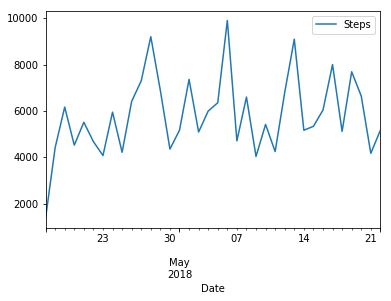

In [115]:
# Days with Steps Visualization
date_steps[date_steps.Steps > 0].plot(x='Date')

In [116]:
# save to csv
date_steps.to_csv('data/daily_steps.csv', index=None, encoding='utf-8')

------

# Weight 

In [117]:
# TODO: https://dev.fitbit.com/build/reference/web-api/body/

----------

# Download Steps Per 15min via Intraday API

In [118]:
# get all Steps stats for a single date
def fitbit_intraday_steps(date):
    fitbit_intra_steps = auth2_client.intraday_time_series('activities/steps', base_date=date, detail_level='15min')
    time_list = []
    val_list = []
    for i in fitbit_intra_steps['activities-steps-intraday']['dataset']:
        val_list.append(i['value'])
        time_list.append(i['time'])
    heartdf = pd.DataFrame({'Steps':val_list,'Time':time_list})
    # add date column
    heartdf['Date'] = date
    # create csv
    heartdf.to_csv('data/steps/steps'+ \
               date+'.csv', \
               columns=['Date', 'Time','Steps'], header=True, \
               index = False)
    print("Generated Steps CSV for %s" % date)

In [119]:
# get multiple date HR data
def fitbit_multidates_steps(datelist):
    for i in datelist[:]:
        fitbit_intraday_steps(i)
        # add a 5 second daily
        # time.sleep(5)

In [120]:
fitbit_intraday_steps(today)

Generated Steps CSV for 2018-05-23


In [121]:
fitbit_intraday_steps(yesterday)

Generated Steps CSV for 2018-05-22


In [122]:
fitbit_multidates_steps(dates_list)

Generated Steps CSV for 2018-04-17
Generated Steps CSV for 2018-04-18
Generated Steps CSV for 2018-04-19
Generated Steps CSV for 2018-04-20
Generated Steps CSV for 2018-04-21
Generated Steps CSV for 2018-04-22
Generated Steps CSV for 2018-04-23
Generated Steps CSV for 2018-04-24
Generated Steps CSV for 2018-04-25
Generated Steps CSV for 2018-04-26
Generated Steps CSV for 2018-04-27
Generated Steps CSV for 2018-04-28
Generated Steps CSV for 2018-04-29
Generated Steps CSV for 2018-04-30
Generated Steps CSV for 2018-05-01
Generated Steps CSV for 2018-05-02
Generated Steps CSV for 2018-05-03
Generated Steps CSV for 2018-05-04
Generated Steps CSV for 2018-05-05
Generated Steps CSV for 2018-05-06
Generated Steps CSV for 2018-05-07
Generated Steps CSV for 2018-05-08
Generated Steps CSV for 2018-05-09
Generated Steps CSV for 2018-05-10
Generated Steps CSV for 2018-05-11
Generated Steps CSV for 2018-05-12
Generated Steps CSV for 2018-05-13
Generated Steps CSV for 2018-05-14
Generated Steps CSV 

--------

# Download Daily Detailed Sleep Log

In [123]:
sleep_daily = [auth2_client.sleep(date) for date in dates_list]

In [124]:
# check raw log of previous day
sleep_daily[-2]

{'sleep': [{'awakeCount': 1,
   'awakeDuration': 1,
   'awakeningsCount': 4,
   'dateOfSleep': '2018-05-22',
   'duration': 24540000,
   'efficiency': 97,
   'endTime': '2018-05-22T06:13:30.000',
   'isMainSleep': True,
   'logId': 18295938516,
   'minuteData': [{'dateTime': '23:24:00', 'value': '1'},
    {'dateTime': '23:25:00', 'value': '1'},
    {'dateTime': '23:26:00', 'value': '1'},
    {'dateTime': '23:27:00', 'value': '1'},
    {'dateTime': '23:28:00', 'value': '1'},
    {'dateTime': '23:29:00', 'value': '1'},
    {'dateTime': '23:30:00', 'value': '1'},
    {'dateTime': '23:31:00', 'value': '1'},
    {'dateTime': '23:32:00', 'value': '1'},
    {'dateTime': '23:33:00', 'value': '1'},
    {'dateTime': '23:34:00', 'value': '1'},
    {'dateTime': '23:35:00', 'value': '1'},
    {'dateTime': '23:36:00', 'value': '1'},
    {'dateTime': '23:37:00', 'value': '1'},
    {'dateTime': '23:38:00', 'value': '1'},
    {'dateTime': '23:39:00', 'value': '1'},
    {'dateTime': '23:40:00', 'value':

In [125]:
# sleep minutes
sleep_minutes = [sleep_entry['summary']['totalMinutesAsleep'] for sleep_entry in sleep_daily]

# in-bed minutes
inbed_minutes = [sleep_entry['summary']['totalTimeInBed'] for sleep_entry in sleep_daily]

# sleep_minutes[-3]
date_sleep = pd.DataFrame({'Date': dates_list, 'Sleep': sleep_minutes, 'InBed': inbed_minutes})

In [126]:
# in bed minutes
inbed_minutes = [sleep_entry['summary']['totalTimeInBed'] for sleep_entry in sleep_daily]
# inbed_minutes[-3]
date_inbed = pd.DataFrame({'Date': dates_list, 'InBed': inbed_minutes})

In [127]:
# save to csv
date_inbed.to_csv('data/daily_inbed.csv', index=None, encoding='utf-8')

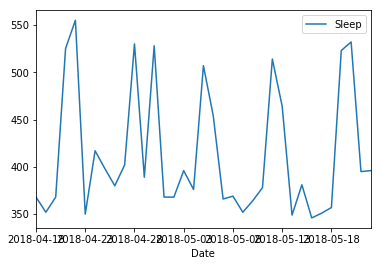

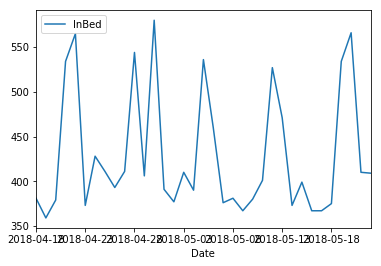

In [128]:
date_sleep[date_sleep.Sleep > 0].plot(x='Date', y="Sleep")
date_inbed[date_inbed.InBed > 0].plot(x='Date', y="InBed")

--------

# Download Daily Sleep Log in Minutes

In [129]:
sleep_ts = auth2_client.time_series('sleep/minutesAsleep', period='1y')

In [130]:
sleep_ts['sleep-minutesAsleep'][-7] # check sleep froma  week ago

{'dateTime': '2018-05-17', 'value': '328'}

In [131]:
date_sleep_list = [(dateutil.parser.parse(date_sleep_dict['dateTime']), int(date_sleep_dict['value']))
              for date_sleep_dict in sleep_ts['sleep-minutesAsleep']]
date_sleep = pd.DataFrame(date_sleep, columns=('Date', 'Sleep'))

In [132]:
date_sleep['Hours'] = round((date_sleep.Sleep / 60), 2)

In [133]:
date_sleep.tail()

,Date,Sleep,Hours
32,2018-05-19,523,8.72
33,2018-05-20,532,8.87
34,2018-05-21,395,6.58
35,2018-05-22,396,6.60
36,2018-05-23,0,0.00


In [134]:
# days with sleep
len(date_sleep[date_sleep.Sleep > 0])

35

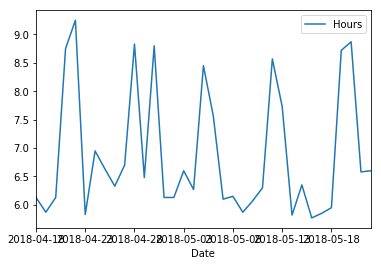

In [135]:
date_sleep[date_sleep.Sleep > 0].plot(x='Date', y='Hours')

In [136]:
# save to csv
date_sleep.to_csv('data/daily_sleep.csv', index=None, encoding='utf-8')

----------

# TODO: Download Daily Resting HR and Other HR Zone Data

In [137]:
hr_ts = auth2_client.time_series('activities/heart', period='30d')

In [138]:
hr_ts['activities-heart'][-7] # check  from a week ago

{'dateTime': '2018-05-17',
 'value': {'customHeartRateZones': [],
  'heartRateZones': [{'caloriesOut': 1960.40251,
    'max': 91,
    'min': 30,
    'minutes': 1278,
    'name': 'Out of Range'},
   {'caloriesOut': 564.21866,
    'max': 127,
    'min': 91,
    'minutes': 141,
    'name': 'Fat Burn'},
   {'caloriesOut': 128.42737,
    'max': 154,
    'min': 127,
    'minutes': 13,
    'name': 'Cardio'},
   {'caloriesOut': 0, 'max': 220, 'min': 154, 'minutes': 0, 'name': 'Peak'}],
  'restingHeartRate': 67}}

In [139]:
# resting hr
hr_ts['activities-heart'][-7]['value']['restingHeartRate'] # check from a week ago

67

In [140]:
# Out of Range data
hr_ts['activities-heart'][-7]['value']['heartRateZones']\
        ['name' == 'Out of Range'] # check  from a week ago

{'caloriesOut': 1960.40251,
 'max': 91,
 'min': 30,
 'minutes': 1278,
 'name': 'Out of Range'}

In [141]:
# Out of Range data = Calories Out
hr_ts['activities-heart'][-7]['value']['heartRateZones']\
        ['name' == 'Out of Range']['caloriesOut'] 

1960.40251

In [142]:
# Fat Burn

In [143]:
# Cardio

In [144]:
# Peak

In [145]:
# trying to parse into a list with date and resting heart rate
#date_hr_list = [(dateutil.parser.parse(date_hr_dict['dateTime']), \
#                (date_hr_dict['value')) \
#                for date_hr_dict in hr_ts['activities-heart']]

In [146]:
# type(date_hr_list)

In [147]:
# type(date_hr_list[-1])

# Download A Full Day Record of Heart Rate

In [148]:
# get all HR stats for a single date
def fitbit_HR_stats(date):
    fitbit_intra_HR = auth2_client.intraday_time_series('activities/heart', base_date=date, detail_level='1sec')
    time_list = []
    val_list = []
    for i in fitbit_intra_HR['activities-heart-intraday']['dataset']:
        val_list.append(i['value'])
        time_list.append(i['time'])
    heartdf = pd.DataFrame({'Heart_Rate':val_list,'Time':time_list})
    # add date column
    heartdf['Date'] = date
    # create csv
    heartdf.to_csv('data/hr/heart'+ \
               date+'.csv', \
               columns=['Date', 'Time','Heart_Rate'], header=True, \
               index = False)
    print("Generated CSV for %s" % date)

In [149]:
# get multiple date HR data
def fitbit_multidates_hr(datelist):
    for i in datelist[:]:
        fitbit_HR_stats(i)
        # add a 5 second daily
        # time.sleep(5)

In [150]:
# today's hr data
fitbit_HR_stats(today)

Generated CSV for 2018-05-23


In [151]:
# yesterday's data
fitbit_HR_stats(yesterday)

Generated CSV for 2018-05-22


In [152]:
# get data for multiple days
fitbit_multidates_hr(dates_list)

Generated CSV for 2018-04-17
Generated CSV for 2018-04-18
Generated CSV for 2018-04-19
Generated CSV for 2018-04-20
Generated CSV for 2018-04-21
Generated CSV for 2018-04-22
Generated CSV for 2018-04-23
Generated CSV for 2018-04-24
Generated CSV for 2018-04-25
Generated CSV for 2018-04-26
Generated CSV for 2018-04-27
Generated CSV for 2018-04-28
Generated CSV for 2018-04-29
Generated CSV for 2018-04-30
Generated CSV for 2018-05-01
Generated CSV for 2018-05-02
Generated CSV for 2018-05-03
Generated CSV for 2018-05-04
Generated CSV for 2018-05-05
Generated CSV for 2018-05-06
Generated CSV for 2018-05-07
Generated CSV for 2018-05-08
Generated CSV for 2018-05-09
Generated CSV for 2018-05-10
Generated CSV for 2018-05-11
Generated CSV for 2018-05-12
Generated CSV for 2018-05-13
Generated CSV for 2018-05-14
Generated CSV for 2018-05-15
Generated CSV for 2018-05-16
Generated CSV for 2018-05-17
Generated CSV for 2018-05-18
Generated CSV for 2018-05-19
Generated CSV for 2018-05-20
Generated CSV 